In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD

# Predicting Heart Disease Using Neural Nets

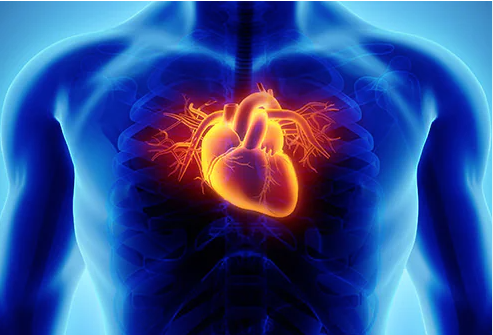

In [5]:
#The dataset
heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Inspecting the dataset

In [6]:
#Checking for null values
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
#High variation among some features such as creatinine_phosphokinase and platelets
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
#All values are either ints or floats
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  i

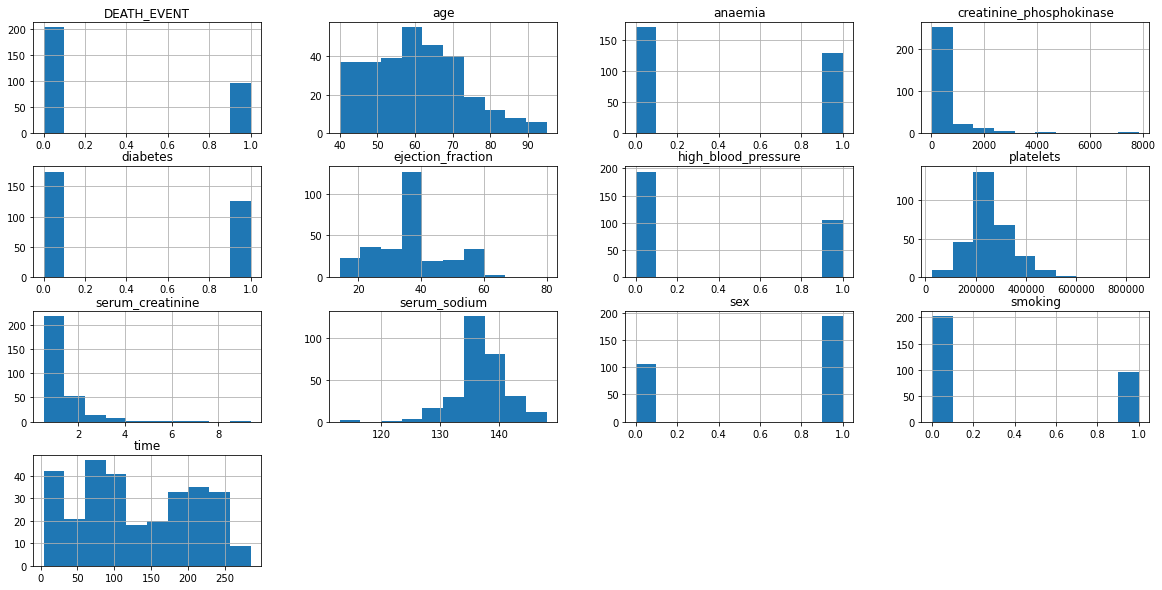

In [9]:
#Check the distributions of the variables
#Variables such as anaemia, sex, smoking, high blood pressure and diabetes are categorical variables.

heart.hist(figsize=(20,10))
plt.show()

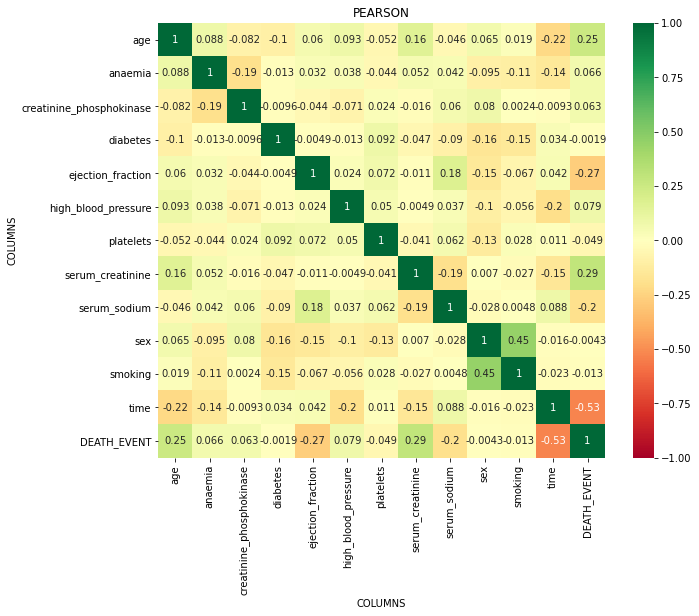

In [10]:
#Correlation between the variables - no significant correlations to worry about

corrPearson = heart.corr(method = "pearson")

figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

In [11]:
# Calculating the variance between the features.

variance = heart.var()
variance

age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64

### Dataset Preprocessing

In [12]:
#Categorical variables
cats = ["anaemia", "sex", "diabetes", "high_blood_pressure", "smoking"]
heart_1 = pd.get_dummies(heart, columns = ["anaemia", "sex", "diabetes", "high_blood_pressure", "smoking"])
print(heart_1)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  time  DEATH_EVENT  anaemia_0  anaemia_1  \
0                 1.9           130     4            1          1          0   
1          

In [13]:
#Convert target variable to categorical variables

target = heart[["DEATH_EVENT"]]
target_category = to_categorical(target)


In [14]:
#All the predictor variables
predictors_1 = heart_1.drop(["DEATH_EVENT"], axis = 1)
predictors_1

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,sex_0,sex_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,1,1,0,1,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,1,1,0,1,0,0,1
3,50.0,111,20,210000.00,1.9,137,7,0,1,0,1,1,0,1,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,1,0,0,1,0,1,0,1,0,1
295,55.0,1820,38,270000.00,1.2,139,271,1,0,1,0,1,0,1,0,1,0
296,45.0,2060,60,742000.00,0.8,138,278,1,0,1,0,0,1,1,0,1,0
297,45.0,2413,38,140000.00,1.4,140,280,1,0,0,1,1,0,1,0,0,1


In [15]:
#Standardize the predictor variables
ss = StandardScaler()
predictors_scaled = ss.fit_transform(predictors_1)

In [16]:
print(predictors_scaled.astype)

<built-in method astype of numpy.ndarray object at 0x7fbdf2b418a0>


### Building the convoluted neural net


In [32]:
#The number of columns

n_cols = predictors_scaled.shape[1]
n_cols

17

In [33]:
#Building the model

model = Sequential()
model.add(Dense(250, activation = "relu", input_shape = (n_cols,)))
model.add(Dense(250, activation = "relu"))
model.add(Dense(250, activation = "relu"))
model.add(Dense(250, activation = "relu"))
model.add(Dense(250, activation = "softmax"))
model.add(Dense(2))

In [34]:
#Compiling the model with early stopping condition
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [44]:
early_stopping_monitor = EarlyStopping(patience = 3)

model_training = model.fit(predictors_scaled, target_category,epochs = 15, callbacks=[early_stopping_monitor])

Epoch 1/15
299/299 [==============================] - 0s 89us/step - loss: 0.2213 - accuracy: 0.8896
Epoch 2/15
299/299 [==============================] - 0s 109us/step - loss: 0.1991 - accuracy: 0.9264
Epoch 3/15
299/299 [==============================] - 0s 102us/step - loss: 0.2066 - accuracy: 0.9398
Epoch 4/15
299/299 [==============================] - 0s 101us/step - loss: 0.7000 - accuracy: 0.9231
Epoch 5/15
299/299 [==============================] - 0s 102us/step - loss: 0.5942 - accuracy: 0.8562
Epoch 6/15
299/299 [==============================] - 0s 101us/step - loss: 0.4035 - accuracy: 0.8194
Epoch 7/15
299/299 [==============================] - 0s 96us/step - loss: 0.3479 - accuracy: 0.8629
Epoch 8/15
299/299 [==============================] - 0s 84us/step - loss: 0.2858 - accuracy: 0.8662
Epoch 9/15
299/299 [==============================] - 0s 82us/step - loss: 0.2475 - accuracy: 0.8963
Epoch 10/15
299/299 [==============================] - 0s 90us/step - loss: 0.2040 - a

In [45]:
results = model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 250)               4500      
_________________________________________________________________
dense_26 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_27 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_28 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_29 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 502       
Total params: 256,002
Trainable params: 256,002
Non-trainable params: 0
________________________________________________

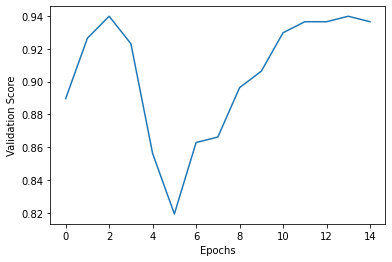

In [46]:
plt.plot(model_training.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Score")
plt.show()

In [47]:
model.save("final_model")

In [48]:
#Adding more nodes

model2 = Sequential()
model2.add(Dense(50, activation = "relu", input_shape = (n_cols,)))
model2.add(Dense(1000, activation = "relu"))
model2.add(Dense(1000, activation = "relu"))
model2.add(Dense(1000, activation = "relu"))
model2.add(Dense(1000, activation = "softmax"))
model2.add(Dense(2))

In [49]:
#Compiling the model with early stopping condition
model2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [50]:
early_stopping_monitor = EarlyStopping(patience = 3)

model_train2 = model2.fit(predictors_scaled, target_category, epochs = 15, callbacks=[early_stopping_monitor])

Epoch 1/15
299/299 [==============================] - 0s 2ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 2/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 3/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 4/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 5/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 6/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 7/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 8/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 9/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accuracy: 0.6789
Epoch 10/15
299/299 [==============================] - 0s 1ms/step - loss: 10.9431 - accura

### Experimenting with different learning rates

In [54]:
model3 = Sequential()
model3.add(Dense(250, activation = "relu", input_shape = (n_cols,)))
model3.add(Dense(250, activation = "relu"))
model3.add(Dense(250, activation = "relu"))
model3.add(Dense(250, activation = "relu"))
model3.add(Dense(250, activation = "softmax"))
model3.add(Dense(2))
model3.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model3.fit(predictors_scaled, target_category, epochs = 15, validation_split = 0.3)

Train on 209 samples, validate on 90 samples
Epoch 1/15
209/209 [==============================] - 0s 974us/step - loss: 1.4111 - accuracy: 0.4833 - val_loss: 0.5510 - val_accuracy: 0.9333
Epoch 2/15
209/209 [==============================] - 0s 104us/step - loss: 0.6432 - accuracy: 0.5885 - val_loss: 0.4435 - val_accuracy: 0.9333
Epoch 3/15
209/209 [==============================] - 0s 119us/step - loss: 0.5857 - accuracy: 0.6411 - val_loss: 0.2505 - val_accuracy: 0.9222
Epoch 4/15
209/209 [==============================] - 0s 118us/step - loss: 0.6336 - accuracy: 0.7416 - val_loss: 0.2807 - val_accuracy: 0.8778
Epoch 5/15
209/209 [==============================] - 0s 114us/step - loss: 0.5453 - accuracy: 0.7033 - val_loss: 0.3861 - val_accuracy: 0.8444
Epoch 6/15
209/209 [==============================] - 0s 122us/step - loss: 0.5675 - accuracy: 0.8038 - val_loss: 0.3264 - val_accuracy: 0.9222
Epoch 7/15
209/209 [==============================] - 0s 121us/step - loss: 0.5367 - accura

In [52]:
model3.save("final__final_model")

In [61]:
results_3 = model3.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 250)               4500      
_________________________________________________________________
dense_68 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_69 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_70 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_71 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 502       
Total params: 256,002
Trainable params: 256,002
Non-trainable params: 0
_______________________________________________